# Q1.0 Dataset Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class StudentDataset:
    """
    Class to generate and store a student dataset with attributes:
    gender, major, program, and GPA.
    """

    def __init__(self, num_students: int, seed: int):
        """
        Initializes the StudentDataset with the given number of students
        and random seed. Generates the dataset upon initialization.
        """
        self.num_students = num_students
        self.seed = seed
        np.random.seed(seed)

        # Generate each attribute
        self.genders = self.generate_gender()
        self.majors = self.generate_major()
        self.programs = self.generate_program(self.majors)
        self.gpas = self.generate_gpa(self.majors)

        # Assemble into a DataFrame
        self.df = self.assemble_dataframe()

    def generate_gender(self) -> list[str]:
        """
        Generates a list of genders for students based on given probabilities.
        """
        genders = np.random.choice(
            ["Male", "Female", "Other"],
            size=self.num_students,
            p=[0.65, 0.33, 0.02]
        )
        return genders.tolist()

    def generate_major(self) -> list[str]:
        """
        Generates a list of majors for students based on given probabilities.
        """
        majors = np.random.choice(
            ["B.Tech", "MS", "PhD"],
            size=self.num_students,
            p=[0.70, 0.20, 0.10]
        )
        return majors.tolist()

    def generate_program(self, majors: list[str]) -> list[str]:
        """
        Generates the program for each student based on their major.
        """
        programs = []
        for major in majors:
            if major == "B.Tech":
                prog = np.random.choice(
                    ["CSE", "ECE", "CHD", "CND"],
                    p=[0.4, 0.4, 0.1, 0.1]
                )
            elif major == "MS":
                prog = np.random.choice(
                    ["CSE", "ECE", "CHD", "CND"],
                    p=[0.3, 0.3, 0.2, 0.2]
                )
            else:  # PhD
                prog = np.random.choice(
                    ["CSE", "ECE", "CHD", "CND"],
                    p=[0.25, 0.25, 0.25, 0.25]
                )
            programs.append(prog)
        return programs

    def generate_gpa(self, majors: list[str]) -> list[float]:
        """
        Generates GPA values normally distributed by major, clipped to [4.0, 10.0].
        """
        gpas = []
        for major in majors:
            if major == "B.Tech":
                gpa = np.random.normal(7.0, 1.0)
            elif major == "MS":
                gpa = np.random.normal(8.0, 0.7)
            else:  # PhD
                gpa = np.random.normal(8.3, 0.5)

            # Clip GPA to range [4.0, 10.0]
            gpa = np.clip(gpa, 4.0, 10.0)
            gpas.append(round(gpa, 2))
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        """
        Assembles the full dataset into a pandas DataFrame.
        """
        df = pd.DataFrame({
            "Gender": self.genders,
            "Major": self.majors,
            "Program": self.programs,
            "GPA": self.gpas
        })
        return df

    def get_full_dataframe(self) -> pd.DataFrame:
        """
        Returns the full student dataset as a pandas DataFrame.
        """
        return self.df


student_data = StudentDataset(num_students=10000, seed=42)

df_students = student_data.get_full_dataframe()

df_students.to_csv("student_dataset.csv", index=False)

df_students.head()


/Users/sejal/anaconda3/lib/python3.11/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.25.2 and <2.6.0 is required for this version of SciPy (detected version 1.24.3)
  from scipy.stats import gaussian_kde


,Gender,Major,Program,GPA
0,Male,B.Tech,ECE,6.37
1,Female,B.Tech,CSE,9.14
2,Female,B.Tech,CSE,8.67
3,Male,B.Tech,ECE,7.73
4,Male,B.Tech,ECE,6.66


# Q1.1 Dataset Analysis

## (a) Visualizations

In [2]:
def plot_gender_distribution(self) -> None:
    """Plot gender distribution."""
    plt.figure(figsize=(6, 4))
    sns.countplot(data=self.df, x="Gender", palette="Set2")
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

def plot_major_distribution(self) -> None:
    """Plot major distribution."""
    plt.figure(figsize=(6, 4))
    sns.countplot(data=self.df, x="Major", palette="Set3")
    plt.title("Major Distribution")
    plt.xlabel("Major")
    plt.ylabel("Count")
    plt.show()

def plot_program_distribution(self) -> None:
    """Plot program distribution."""
    plt.figure(figsize=(6, 4))
    sns.countplot(data=self.df, x="Program", palette="muted")
    plt.title("Program Distribution")
    plt.xlabel("Program")
    plt.ylabel("Count")
    plt.show()

def plot_gpa_distribution(self, bins: int = 20) -> None:
    """Plot GPA distribution."""
    plt.figure(figsize=(7, 5))
    sns.histplot(self.df["GPA"], bins=bins, kde=True, color="skyblue")
    plt.title("GPA Distribution")
    plt.xlabel("GPA")
    plt.ylabel("Frequency")
    plt.show()

def plot_program_by_major(self) -> None:
    """Plot program distribution conditioned on major."""
    plt.figure(figsize=(8, 5))
    sns.countplot(data=self.df, x="Program", hue="Major", palette="husl")
    plt.title("Program Distribution by Major")
    plt.xlabel("Program")
    plt.ylabel("Count")
    plt.legend(title="Major")
    plt.show()

def plot_gpa_by_major(self) -> None:
    """Plot GPA distribution by major."""
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=self.df, x="Major", y="GPA", palette="coolwarm")
    plt.title("GPA by Major")
    plt.xlabel("Major")
    plt.ylabel("GPA")
    plt.show()

def plot_gpa_by_program(self) -> None:
    """Plot GPA distribution by program."""
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=self.df, x="Program", y="GPA", palette="Set2")
    plt.title("GPA by Program")
    plt.xlabel("Program")
    plt.ylabel("GPA")
    plt.show()

def plot_gpa_by_program_and_major(self) -> None:
    """Plot GPA distribution by both program and major."""
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=self.df, x="Program", y="GPA", hue="Major", palette="husl")
    plt.title("GPA by Program and Major")
    plt.xlabel("Program")
    plt.ylabel("GPA")
    plt.legend(title="Major")
    plt.show()

def plot_sampled_dataset(self) -> None:
    """Plot a sample of 100 students showing gender, major, program, and GPA."""
    np.random.seed(self.seed)
    sample_df = self.df.sample(n=100, random_state=self.seed)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sample_df, x="Program", y="GPA", hue="Major", style="Gender", s=80)
    plt.title("Sample of 100 Students: GPA vs Program (by Major & Gender)")
    plt.xlabel("Program")
    plt.ylabel("GPA")
    plt.legend(title="Major/Gender")
    plt.show()

def plot_entire_dataset_summary(self) -> None:
    """Show pairplot summary of the entire dataset."""
    sns.pairplot(self.df, hue="Major", diag_kind="kde", palette="husl")
    plt.suptitle("Dataset Summary (Pairplot)", y=1.02)
    plt.show()

StudentDataset.plot_gender_distribution = plot_gender_distribution
StudentDataset.plot_major_distribution = plot_major_distribution
StudentDataset.plot_program_distribution = plot_program_distribution
StudentDataset.plot_gpa_distribution = plot_gpa_distribution
StudentDataset.plot_program_by_major = plot_program_by_major
StudentDataset.plot_gpa_by_major = plot_gpa_by_major
StudentDataset.plot_gpa_by_program = plot_gpa_by_program
StudentDataset.plot_gpa_by_program_and_major = plot_gpa_by_program_and_major
StudentDataset.plot_sampled_dataset = plot_sampled_dataset
StudentDataset.plot_entire_dataset_summary = plot_entire_dataset_summary


/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_4541/2817220259.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x="Gender", palette="Set2")


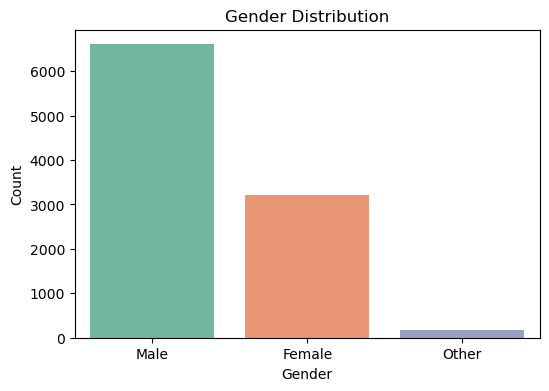

In [3]:
student_data.plot_gender_distribution()

/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_4541/2817220259.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x="Major", palette="Set3")


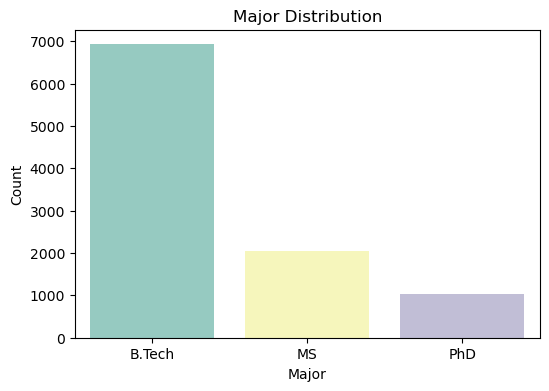

In [4]:
student_data.plot_major_distribution()

/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_4541/2817220259.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x="Program", palette="muted")


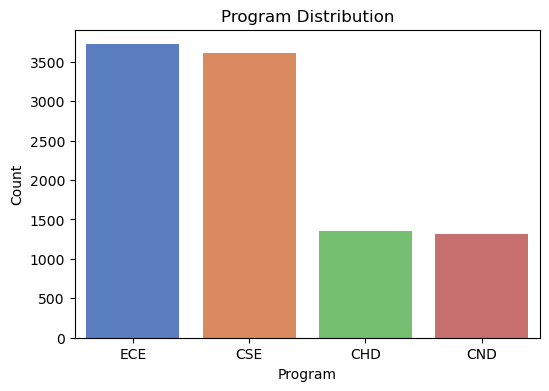

In [5]:
student_data.plot_program_distribution()

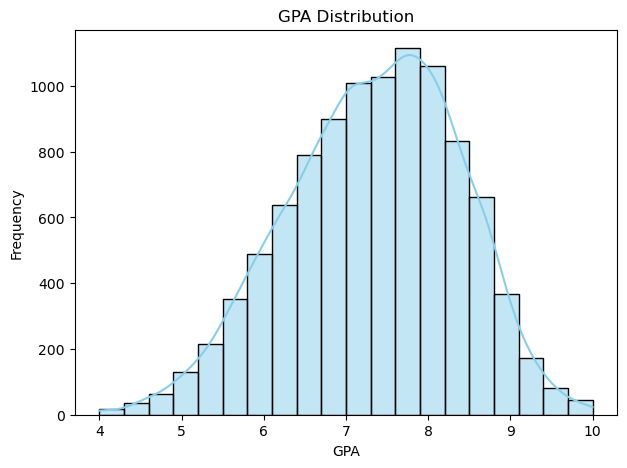

In [6]:
student_data.plot_gpa_distribution()

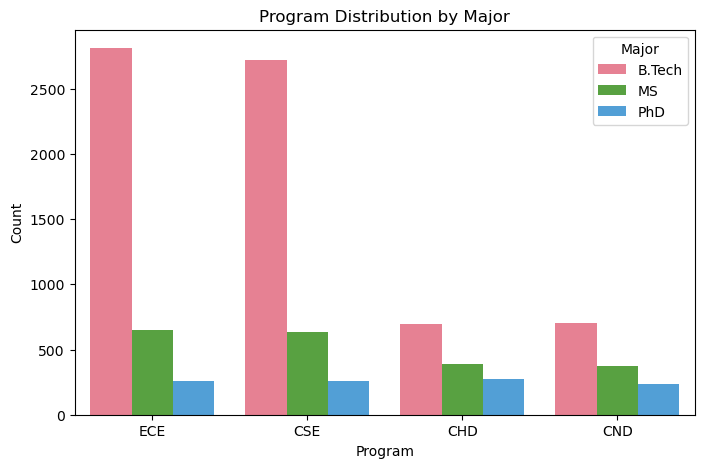

In [7]:
student_data.plot_program_by_major()

/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_4541/2817220259.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x="Major", y="GPA", palette="coolwarm")


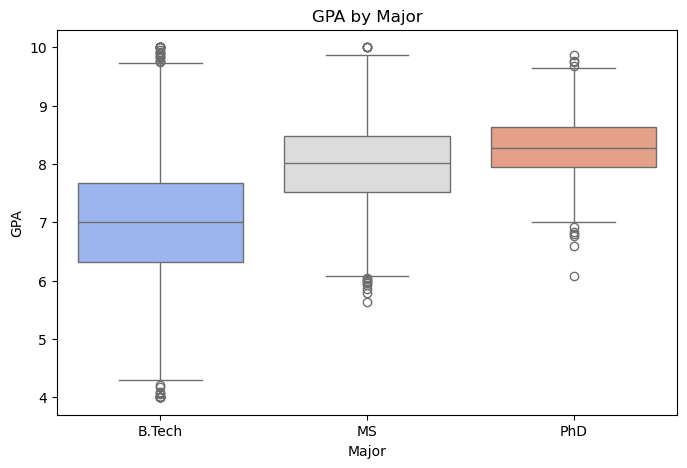

In [8]:
student_data.plot_gpa_by_major()

/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_4541/2817220259.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x="Program", y="GPA", palette="Set2")


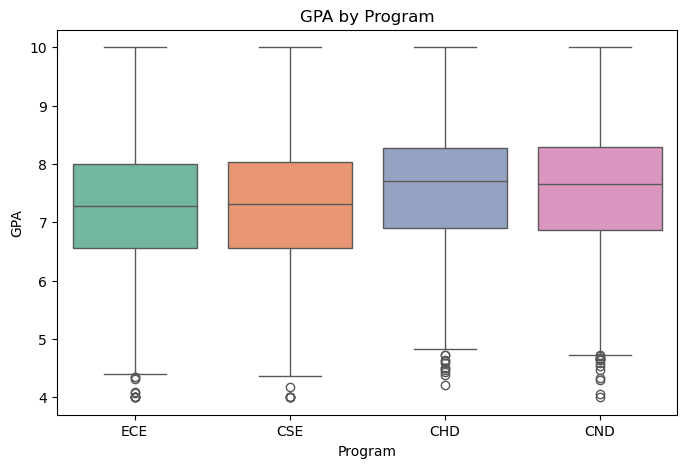

In [9]:
student_data.plot_gpa_by_program()

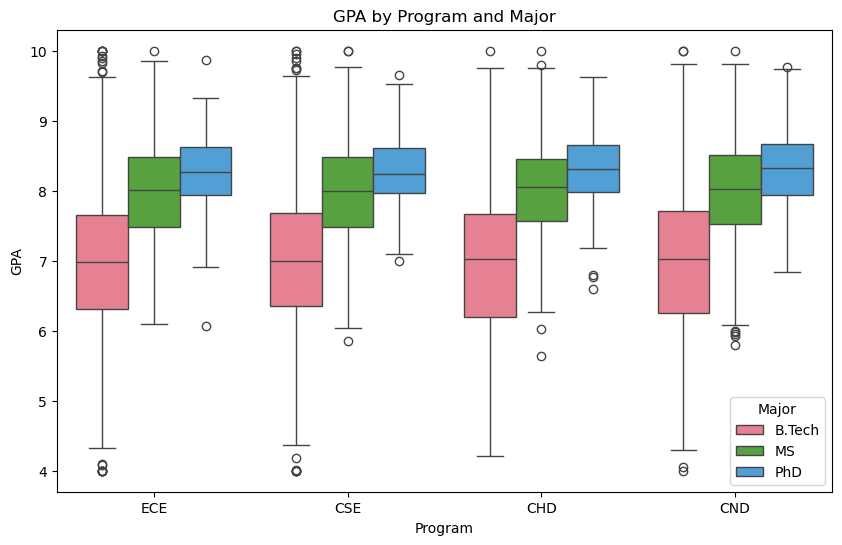

In [10]:
student_data.plot_gpa_by_program_and_major()

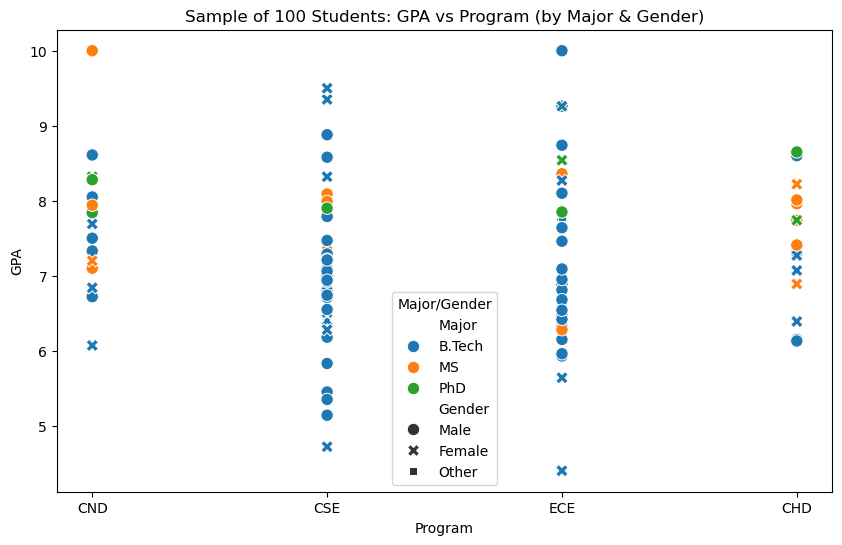

In [11]:
student_data.plot_sampled_dataset()

/Users/sejal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


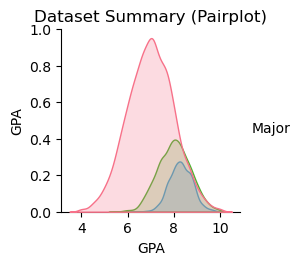

In [12]:
student_data.plot_entire_dataset_summary()

## (b)  GPA Summary Statistics

In [13]:
def gpa_mean_std(self) -> tuple[float, float]:
    """Compute and return the mean and standard deviation of GPA."""
    mean_gpa = self.df["GPA"].mean()
    std_gpa = self.df["GPA"].std()
    print(f"Mean GPA: {mean_gpa:.2f}")
    print(f"Standard Deviation of GPA: {std_gpa:.2f}")
    return mean_gpa, std_gpa

# Attaching this method to existing class
StudentDataset.gpa_mean_std = gpa_mean_std

In [14]:
student_data.gpa_mean_std()

Mean GPA: 7.33
Standard Deviation of GPA: 1.04


(7.332147, 1.0415973660192763)

## (c) Program-Major Combinations

In [15]:
def count_students_per_program_major_pair(self) -> pd.DataFrame:
    """Count the number of students for each unique (Program, Major) pair."""
    counts_df = self.df.groupby(["Program", "Major"]).size().reset_index(name="Count")
    print("Counts for each (Program, Major) pair:")
    print(counts_df)
    return counts_df


def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
    """Visualize the student counts for each (Program, Major) pair using a heatmap."""
    pivot_df = counts_df.pivot(index="Program", columns="Major", values="Count")
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_df, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Student Counts by Program and Major")
    plt.xlabel("Major")
    plt.ylabel("Program")
    plt.show()


StudentDataset.count_students_per_program_major_pair = count_students_per_program_major_pair
StudentDataset.visualize_students_per_program_major_pair = visualize_students_per_program_major_pair

Counts for each (Program, Major) pair:
   Program   Major  Count
0      CHD  B.Tech    697
1      CHD      MS    389
2      CHD     PhD    273
3      CND  B.Tech    702
4      CND      MS    377
5      CND     PhD    232
6      CSE  B.Tech   2717
7      CSE      MS    633
8      CSE     PhD    260
9      ECE  B.Tech   2812
10     ECE      MS    652
11     ECE     PhD    256


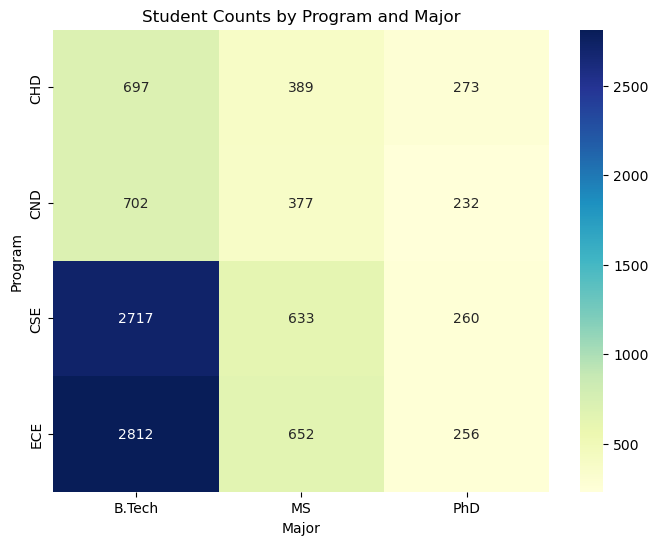

In [16]:
# Compute counts
counts_df = student_data.count_students_per_program_major_pair()

# Visualize heatmap
student_data.visualize_students_per_program_major_pair(counts_df)

The heatmap shows the number of students for each (Program, Major) combination. Darker colors indicate higher counts, highlighting that B.Tech programs in CSE and ECE have the largest student populations.

## Q1.2 Simple vs Stratified Sampling

In [17]:
class StudentDataset:
    def __init__(self, df):
        self.df = df

    # (a) Random Sampling Method
    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        mean_gpas = []

        for _ in range(repeats):
            sample = self.df.sample(n=n, replace=False)
            mean_gpas.append(sample['GPA'].mean())

        avg_mean_gpa = np.mean(mean_gpas)
        std_of_means = np.std(mean_gpas)
        return avg_mean_gpa, std_of_means

    # (b) Stratified Sampling by Major
    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        mean_gpas = []
        majors = self.df['Major'].unique()
        major_counts = self.df['Major'].value_counts(normalize=True)  # proportions

        for _ in range(repeats):
            stratified_samples = []
            for major, proportion in major_counts.items():
                n_major = int(proportion * n)
                major_df = self.df[self.df['Major'] == major]
                stratified_samples.append(major_df.sample(n=n_major, replace=False))
            stratified_df = pd.concat(stratified_samples)
            mean_gpas.append(stratified_df['GPA'].mean())

        avg_mean_gpa = np.mean(mean_gpas)
        std_of_means = np.std(mean_gpas)
        return avg_mean_gpa, std_of_means


In [18]:
import numpy as np
import pandas as pd

def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
    """Compute mean GPA and std of mean GPAs using random sampling."""
    mean_gpas = []
    for _ in range(repeats):
        sample = self.df.sample(n=n, replace=False)
        mean_gpas.append(sample['GPA'].mean())
    avg_mean_gpa = np.mean(mean_gpas)
    std_of_means = np.std(mean_gpas)
    return avg_mean_gpa, std_of_means


def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
    """Compute mean GPA and std of mean GPAs using stratified sampling by major."""
    mean_gpas = []
    majors = self.df['Major'].unique()
    major_counts = self.df['Major'].value_counts(normalize=True)

    for _ in range(repeats):
        stratified_samples = []
        for major, proportion in major_counts.items():
            n_major = int(proportion * n)
            major_df = self.df[self.df['Major'] == major]
            if len(major_df) >= n_major and n_major > 0:
                stratified_samples.append(major_df.sample(n=n_major, replace=False))
        stratified_df = pd.concat(stratified_samples)
        mean_gpas.append(stratified_df['GPA'].mean())

    avg_mean_gpa = np.mean(mean_gpas)
    std_of_means = np.std(mean_gpas)
    return avg_mean_gpa, std_of_means

In [19]:
from types import MethodType

student_data.get_gpa_mean_std_random = MethodType(get_gpa_mean_std_random, student_data)
student_data.get_gpa_mean_std_stratified = MethodType(get_gpa_mean_std_stratified, student_data)

In [20]:
random_mean, random_std = student_data.get_gpa_mean_std_random()
strat_mean, strat_std = student_data.get_gpa_mean_std_stratified()

print(f"Random Sampling → Mean GPA: {random_mean:.3f}, Std of Means: {random_std:.3f}")
print(f"Stratified Sampling → Mean GPA: {strat_mean:.3f}, Std of Means: {strat_std:.3f}")

if strat_std < random_std:
    print("\nStratified sampling has lower standard deviation because it ensures proportional representation of all majors, reducing sampling variability.")
else:
    print("\nRandom sampling has lower or similar deviation in this case, which might be due to balanced major distribution in the dataset.")


Random Sampling → Mean GPA: 7.338, Std of Means: 0.044
Stratified Sampling → Mean GPA: 7.343, Std of Means: 0.034

Stratified sampling has lower standard deviation because it ensures proportional representation of all majors, reducing sampling variability.


## Q1.3 Gender-Balanced Cohort

In [21]:
def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
    """
    Sample n students with equal counts across genders. Repeat 'repeats' times.
    Returns a list of dictionaries with gender counts for each repeat.
    """
    genders = self.df['Gender'].unique()
    per_gender = n // len(genders)
    results = []

    for _ in range(repeats):
        samples = []
        for g in genders:
            gender_df = self.df[self.df['Gender'] == g]
            samples.append(gender_df.sample(n=per_gender, replace=False))
        combined = pd.concat(samples)
        results.append(combined['Gender'].value_counts().to_dict())

    return results


def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
    """
    Sampling Strategy A: Randomly pick a gender with equal probability,
    then randomly select one student from that gender.
    Repeat n times per trial, and repeat the trial 'repeats' times.
    Returns a list of gender count dictionaries for each repeat.
    """
    genders = self.df['Gender'].unique()
    results = []

    for _ in range(repeats):
        chosen_students = []
        for _ in range(n):
            chosen_gender = np.random.choice(genders)  # equal probability
            gender_df = self.df[self.df['Gender'] == chosen_gender]
            chosen_students.append(gender_df.sample(n=1, replace=False))
        combined = pd.concat(chosen_students)
        results.append(combined['Gender'].value_counts().to_dict())

    return results


def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10) -> None:
    """
    For each sample size, perform uniform gender sampling 'repeats' times.
    Compute the average maximum relative gender difference and plot the results.
    """
    avg_diffs = []

    for n in sample_sizes:
        diffs = []
        for _ in range(repeats):
            gender_counts = self.sample_gender_uniform_random(n=n, repeats=1)[0]
            max_diff = max(gender_counts.values()) - min(gender_counts.values())
            rel_diff = max_diff / n
            diffs.append(rel_diff)
        avg_diffs.append(np.mean(diffs))

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.barplot(x=sample_sizes, y=avg_diffs, palette="coolwarm")
    plt.title("Average Maximum Relative Gender Difference vs Sample Size")
    plt.xlabel("Sample Size (n)")
    plt.ylabel("Average Max Relative Difference")
    plt.show()

In [22]:
from types import MethodType

student_data.get_gender_balanced_counts = MethodType(get_gender_balanced_counts, student_data)
student_data.sample_gender_uniform_random = MethodType(sample_gender_uniform_random, student_data)
student_data.plot_avg_max_gender_diff_vs_sample_size = MethodType(plot_avg_max_gender_diff_vs_sample_size, student_data)

In [23]:
balanced_counts = student_data.get_gender_balanced_counts()
balanced_counts

[{'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100}]

In [24]:
uniform_counts = student_data.sample_gender_uniform_random()
uniform_counts

[{'Other': 112, 'Female': 98, 'Male': 90},
 {'Male': 106, 'Other': 101, 'Female': 93},
 {'Female': 106, 'Male': 101, 'Other': 93},
 {'Other': 105, 'Male': 102, 'Female': 93},
 {'Other': 111, 'Female': 96, 'Male': 93}]

/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_4541/3123796629.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sample_sizes, y=avg_diffs, palette="coolwarm")


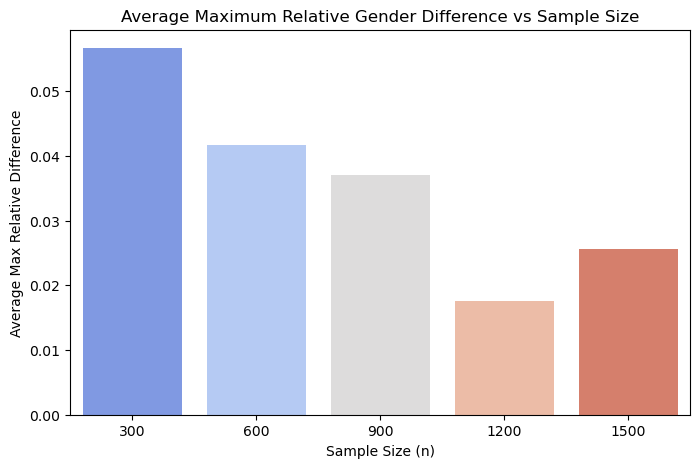

In [25]:
sample_sizes = [300, 600, 900, 1200, 1500]
student_data.plot_avg_max_gender_diff_vs_sample_size(sample_sizes)

## Q1.4 GPA-Uniform Cohort

In [26]:
def sample_gpa_uniform(self, n: int = 100, bins: int = 10) -> pd.DataFrame:
    """
    Sample 'n' students such that their GPA values are approximately
    uniformly distributed across 'bins' bins.
    Sampling is done *without replacement* to avoid duplicates.
    """
    df = self.df.copy()
    df['GPA_bin'] = pd.cut(df['GPA'], bins=bins, labels=False)

    # Calculate how many to sample per bin
    per_bin = n // bins
    sampled_students = []

    for b in range(bins):
        bin_df = df[df['GPA_bin'] == b]
        if len(bin_df) > 0:
            sampled_students.append(bin_df.sample(n=min(per_bin, len(bin_df)), replace=False))

    sampled_df = pd.concat(sampled_students)
    sampled_df = sampled_df.drop(columns=['GPA_bin'])
    return sampled_df


def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame) -> None:
    """
    Plot comparison of GPA distribution between full dataset and uniform-sampled dataset.
    """
    plt.figure(figsize=(10, 5))
    sns.histplot(self.df['GPA'], bins=20, kde=True, color='blue', label='Original Dataset', alpha=0.6)
    sns.histplot(sampled_df['GPA'], bins=10, kde=True, color='orange', label='Uniform-Sampled Cohort', alpha=0.7)
    plt.title("Comparison of GPA Distribution: Original vs Uniform-Sampled Cohort")
    plt.xlabel("GPA")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

In [27]:
from types import MethodType

student_data.sample_gpa_uniform = MethodType(sample_gpa_uniform, student_data)
student_data.plot_gpa_histogram_comparison = MethodType(plot_gpa_histogram_comparison, student_data)

In [28]:
#Generate uniform GPA sample
sampled_gpa_df = student_data.sample_gpa_uniform(n=100, bins=10)
sampled_gpa_df.head()

,Gender,Major,Program,GPA
6549,Male,B.Tech,CSE,4.54
4598,Male,B.Tech,ECE,4.49
7327,Female,B.Tech,CHD,4.47
9305,Male,B.Tech,ECE,4.00
7147,Male,B.Tech,ECE,4.47


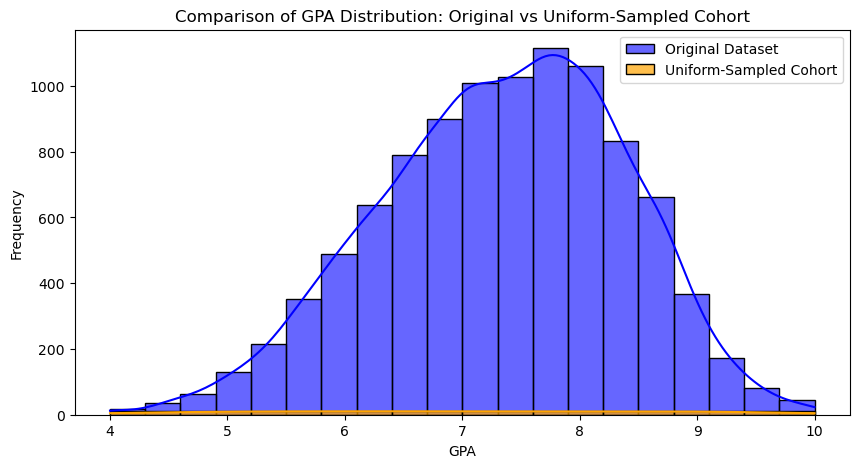

In [29]:
#Plot comparison between original vs sampled
student_data.plot_gpa_histogram_comparison(sampled_gpa_df)

## Q1.5 Program-Major Balanced Cohort

In [30]:
def sample_program_major_balanced(self, n: int = 60) -> pd.DataFrame:
    """
    Sample 'n' students such that all valid (Program, Major) combinations
    are represented approximately equally using Sampling Strategy A.

    If a group has fewer students than the target, sample all available students.
    Sampling is done without replacement.
    """
    df = self.df.copy()
    groups = df.groupby(['Program', 'Major'])
    combinations = groups.size().index.tolist()

    # Determine target samples per combination
    per_combo = n // len(combinations)
    sampled_dfs = []

    for (prog, maj), group_df in groups:
        sample_count = min(per_combo, len(group_df))
        sampled_dfs.append(group_df.sample(n=sample_count, replace=False))

    sampled_df = pd.concat(sampled_dfs)
    return sampled_df


def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame) -> None:
    """
    Display the count of students for each (Program, Major) pair
    and visualize them as a heatmap.
    """
    counts = sampled_df.groupby(['Program', 'Major']).size().unstack(fill_value=0)

    # Display counts
    print("Counts of Students per (Program, Major) Combination:\n")
    display(counts)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(counts, annot=True, cmap="YlGnBu", fmt="d")
    plt.title("Program-Major Balanced Cohort: Student Counts Heatmap")
    plt.xlabel("Major")
    plt.ylabel("Program")
    plt.show()

In [31]:
from types import MethodType

student_data.sample_program_major_balanced = MethodType(sample_program_major_balanced, student_data)
student_data.show_program_major_counts_and_heatmap = MethodType(show_program_major_counts_and_heatmap, student_data)

In [32]:
# Creating balanced sample
sampled_pm_df = student_data.sample_program_major_balanced(n=60)
sampled_pm_df.head()

,Gender,Major,Program,GPA
9142,Female,B.Tech,CHD,6.50
1607,Female,B.Tech,CHD,6.70
9542,Male,B.Tech,CHD,7.19
309,Male,B.Tech,CHD,7.40
4814,Female,B.Tech,CHD,7.71


Counts of Students per (Program, Major) Combination:



Major,B.Tech,MS,PhD
Program,,,
CHD,5,5,5
CND,5,5,5
CSE,5,5,5
ECE,5,5,5


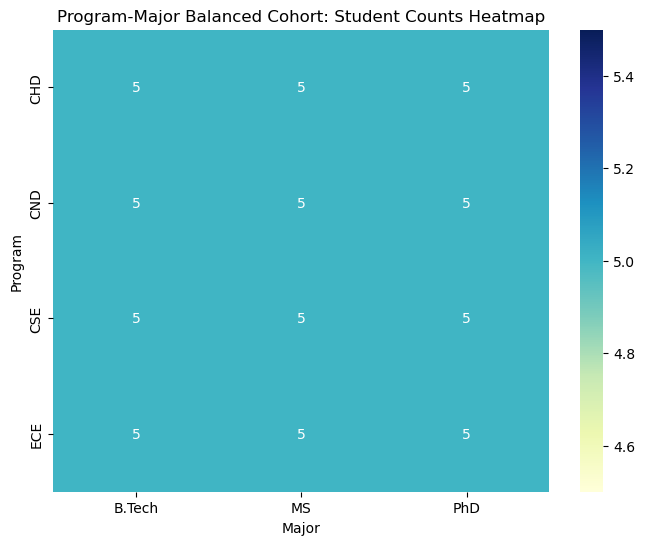

In [33]:
# Showing counts and heatmap
student_data.show_program_major_counts_and_heatmap(sampled_pm_df)

# Q2.0 k-Nearest Neighbors

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('student_dataset.csv')

df.head()

,Gender,Major,Program,GPA
0,Male,B.Tech,ECE,6.37
1,Female,B.Tech,CSE,9.14
2,Female,B.Tech,CSE,8.67
3,Male,B.Tech,ECE,7.73
4,Male,B.Tech,ECE,6.66


In [35]:
# Task: Train/val/test split the dataset and apply data transforms

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Test set: {len(test_df)} samples")

# Prepare features function
def prepare_features(train, val, test):
    # Scale GPA
    scaler = StandardScaler()
    train_gpa = scaler.fit_transform(train[['GPA']])
    val_gpa = scaler.transform(val[['GPA']])
    test_gpa = scaler.transform(test[['GPA']])
    
    # One-hot encode categorical features
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    train_cat = encoder.fit_transform(train[['Major', 'Program']])
    val_cat = encoder.transform(val[['Major', 'Program']])
    test_cat = encoder.transform(test[['Major', 'Program']])
    
    # Combine features
    X_train = np.hstack([train_gpa, train_cat])
    X_val = np.hstack([val_gpa, val_cat])
    X_test = np.hstack([test_gpa, test_cat])
    
    # Prepare labels
    y_train = (train['Gender'] == 'Female').astype(int)
    y_val = (val['Gender'] == 'Female').astype(int)
    y_test = (test['Gender'] == 'Female').astype(int)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = prepare_features(train_df, val_df, test_df)
print(f"\nFeature matrix shapes - Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Training set: 6000 samples
Validation set: 2000 samples
Test set: 2000 samples

Feature matrix shapes - Train: (6000, 6), Val: (2000, 6), Test: (2000, 6)


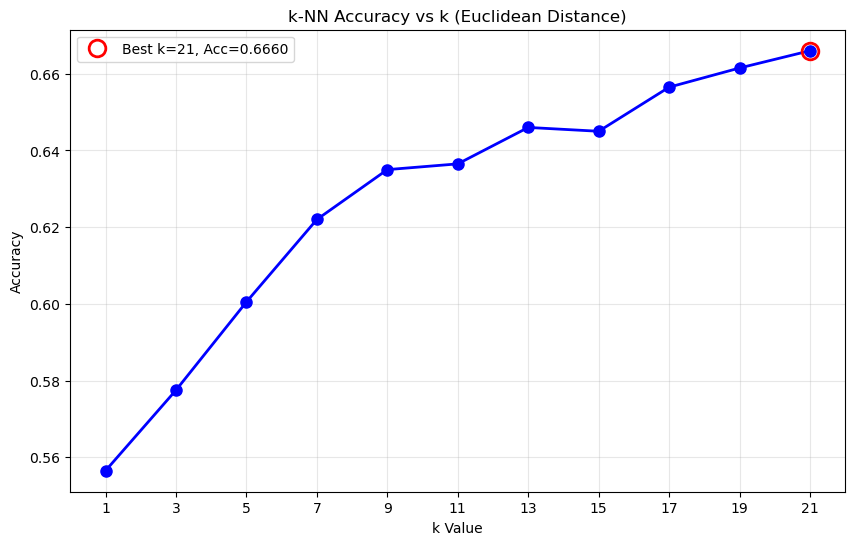

Best k for Euclidean: 21
Best accuracy: 0.6660


In [36]:
# Task: What value of k gave highest accuracy with Euclidean distance?

k_values = list(range(1, 22, 2))  # Odd values from 1 to 21

def evaluate_knn(X_train, y_train, X_val, y_val, k_values, metric='euclidean'):
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        accuracies.append(accuracy_score(y_val, y_pred))
    return accuracies

# Euclidean distance
euclidean_acc = evaluate_knn(X_train, y_train, X_val, y_val, k_values, 'euclidean')
best_k_euclidean = k_values[np.argmax(euclidean_acc)]
best_acc_euclidean = max(euclidean_acc)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_acc, 'bo-', linewidth=2, markersize=8)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs k (Euclidean Distance)')
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.plot(best_k_euclidean, best_acc_euclidean, 'ro', markersize=12, 
         markeredgewidth=2, markerfacecolor='none', 
         label=f'Best k={best_k_euclidean}, Acc={best_acc_euclidean:.4f}')
plt.legend()
plt.show()

print(f"Best k for Euclidean: {best_k_euclidean}")
print(f"Best accuracy: {best_acc_euclidean:.4f}")

Manhattan - Best k: 21, Accuracy: 0.6670
Cosine - Best k: 21, Accuracy: 0.6675


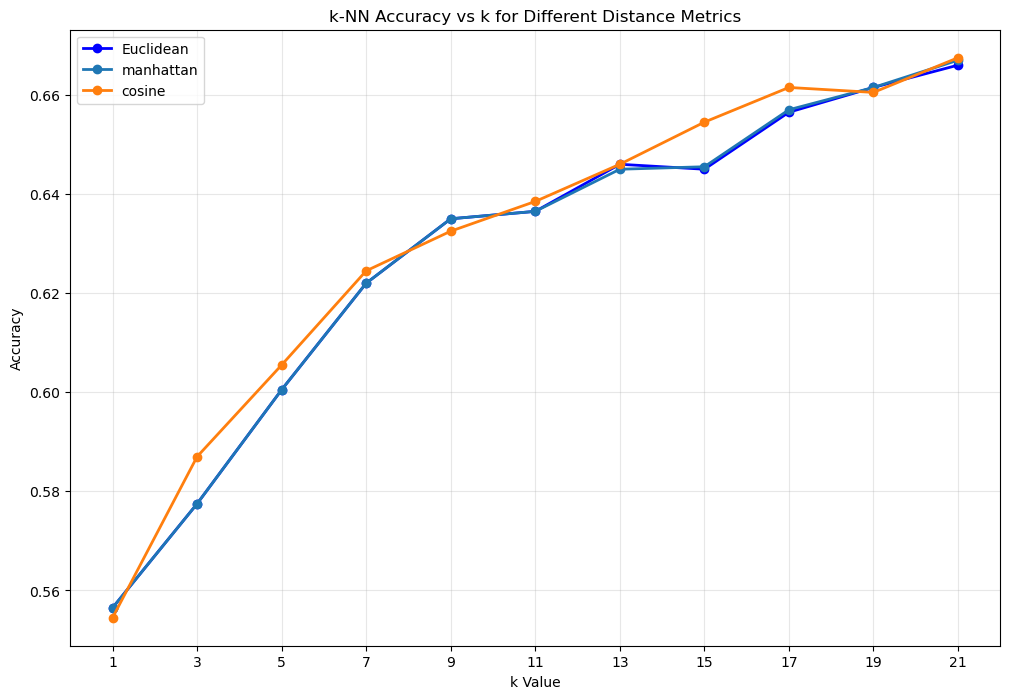

In [37]:
# Task: Repeat for Manhattan and Cosine Similarity

metrics = ['manhattan', 'cosine']
results = {}

plt.figure(figsize=(12, 8))

# Plot Euclidean (from previous)
plt.plot(k_values, euclidean_acc, 'bo-', label='Euclidean', linewidth=2)

# Test other metrics
for metric in metrics:
    accuracies = evaluate_knn(X_train, y_train, X_val, y_val, k_values, metric)
    results[metric] = accuracies
    best_k = k_values[np.argmax(accuracies)]
    best_acc = max(accuracies)
    plt.plot(k_values, accuracies, 'o-', label=metric, linewidth=2)
    print(f"{metric.capitalize()} - Best k: {best_k}, Accuracy: {best_acc:.4f}")

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs k for Different Distance Metrics')
plt.xticks(k_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Euclidean - Best k: 1, Best F1: 0.3054
Manhattan - Best k: 1, Best F1: 0.3054
Cosine - Best k: 1, Best F1: 0.3245


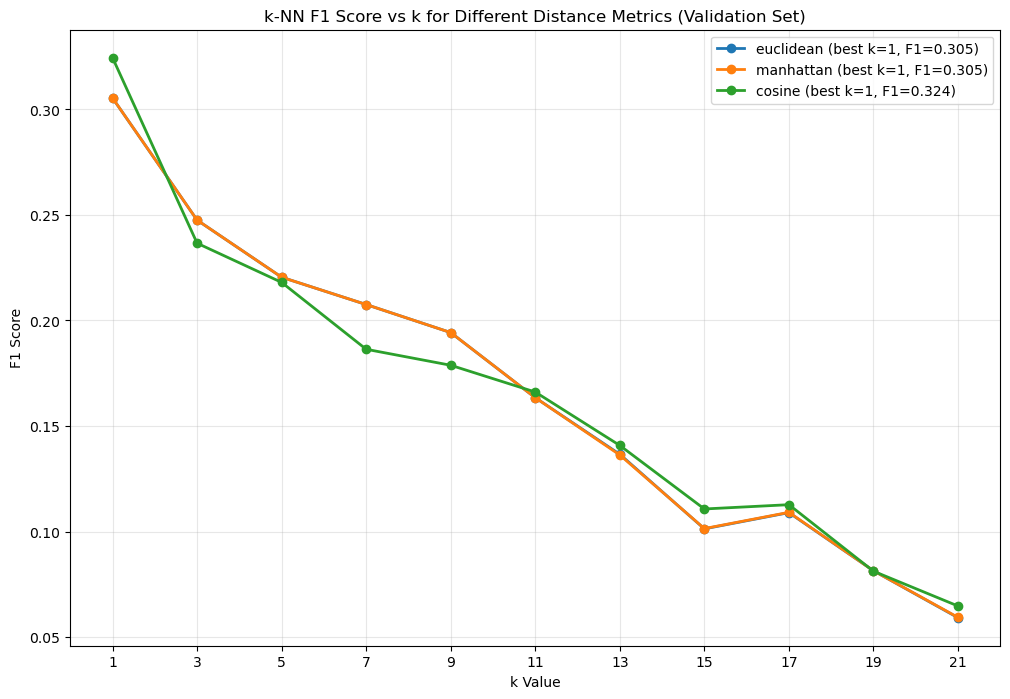

In [38]:
# Task: Report validation F-1 score vs k for all three distance metrics

def evaluate_knn_f1(X_train, y_train, X_val, y_val, k_values, metric='euclidean'):
    f1_scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        f1_scores.append(f1_score(y_val, y_pred))
    return f1_scores

# Calculate F1 scores for all metrics
metrics_all = ['euclidean', 'manhattan', 'cosine']
f1_results = {}

plt.figure(figsize=(12, 8))
for metric in metrics_all:
    f1_scores = evaluate_knn_f1(X_train, y_train, X_val, y_val, k_values, metric)
    f1_results[metric] = f1_scores
    best_f1 = max(f1_scores)
    best_k = k_values[np.argmax(f1_scores)]
    plt.plot(k_values, f1_scores, 'o-', label=f'{metric} (best k={best_k}, F1={best_f1:.3f})', linewidth=2)
    print(f"{metric.capitalize()} - Best k: {best_k}, Best F1: {best_f1:.4f}")

plt.xlabel('k Value')
plt.ylabel('F1 Score')
plt.title('k-NN F1 Score vs k for Different Distance Metrics (Validation Set)')
plt.xticks(k_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

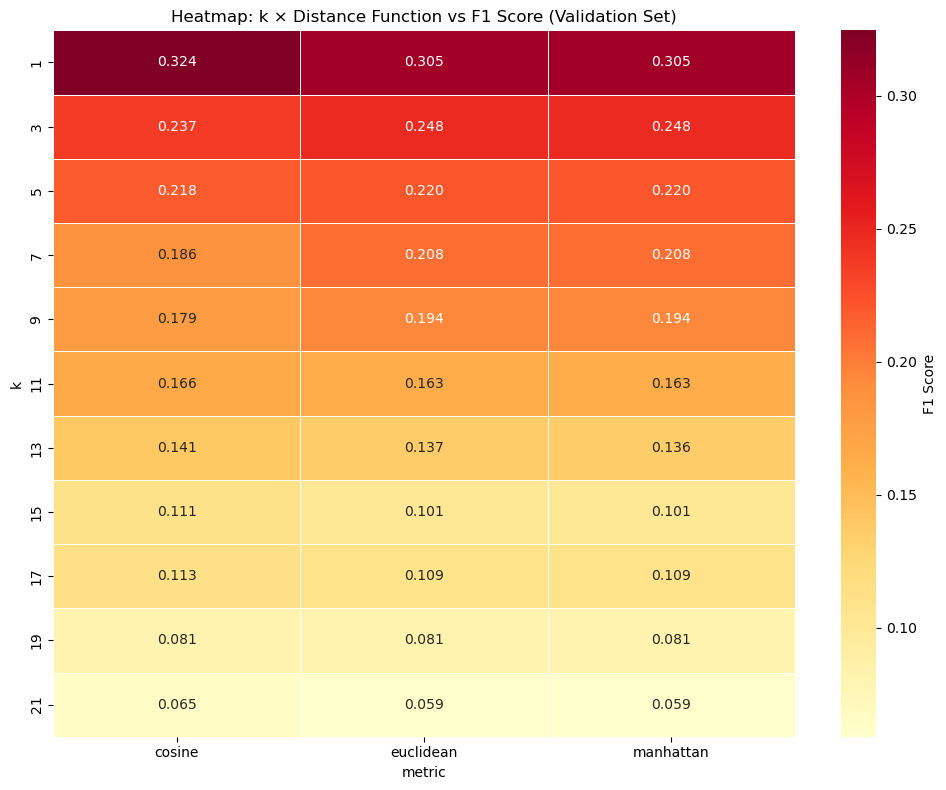

Heatmap Data:
metric  cosine  euclidean  manhattan
k                                   
1        0.324      0.305      0.305
3        0.237      0.248      0.248
5        0.218      0.220      0.220
7        0.186      0.208      0.208
9        0.179      0.194      0.194
11       0.166      0.163      0.163
13       0.141      0.137      0.136
15       0.111      0.101      0.101
17       0.113      0.109      0.109
19       0.081      0.081      0.081
21       0.065      0.059      0.059


In [39]:
# Task: Plot heatmap - k × distance function vs F-1 score

# Create heatmap data
heatmap_data = []
for metric in metrics_all:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        heatmap_data.append({'k': k, 'metric': metric, 'f1_score': f1})

heatmap_df = pd.DataFrame(heatmap_data)
heatmap_pivot = heatmap_df.pivot(index='k', columns='metric', values='f1_score')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt='.3f', cmap='YlOrRd', 
            cbar_kws={'label': 'F1 Score'}, linewidths=0.5)
plt.title('Heatmap: k × Distance Function vs F1 Score (Validation Set)')
plt.tight_layout()
plt.show()

print("Heatmap Data:")
print(heatmap_pivot.round(3))

In [40]:
# Task: Which distance metric performs better? Why might that be?

# Find best overall performance
best_metric = None
best_f1 = 0
best_k_overall = 0

for metric in metrics_all:
    f1_scores = f1_results[metric]
    max_f1 = max(f1_scores)
    if max_f1 > best_f1:
        best_f1 = max_f1
        best_metric = metric
        best_k_overall = k_values[np.argmax(f1_scores)]

print(f"Best performing distance metric: {best_metric}")
print(f"Best F1 score: {best_f1:.4f} at k={best_k_overall}")

print("\nWhy this metric might perform better:")
if best_metric == 'euclidean':
    print("- Euclidean distance works well when features have similar scales (which we ensured through standardization)")
    print("- Good for normally distributed data")
elif best_metric == 'manhattan':
    print("- Manhattan distance is more robust to outliers")
    print("- Works well when data has many irrelevant features")
elif best_metric == 'cosine':
    print("- Cosine similarity is good for high-dimensional data")
    print("- Focuses on orientation rather than magnitude")

print(f"\nPerformance comparison:")
for metric in metrics_all:
    best_f1_metric = max(f1_results[metric])
    print(f"{metric.capitalize()}: {best_f1_metric:.4f}")

Best performing distance metric: cosine
Best F1 score: 0.3245 at k=1

Why this metric might perform better:
- Cosine similarity is good for high-dimensional data
- Focuses on orientation rather than magnitude

Performance comparison:
Euclidean: 0.3054
Manhattan: 0.3054
Cosine: 0.3245


In [41]:
# Task: Single feature F-1 score table for test set

def single_feature_test(feature_name, k_values, metric='euclidean'):
    if feature_name == 'GPA':
        # Numeric feature
        scaler = StandardScaler()
        X_train_single = scaler.fit_transform(train_df[[feature_name]])
        X_test_single = scaler.transform(test_df[[feature_name]])
    else:
        # Categorical feature
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        X_train_single = encoder.fit_transform(train_df[[feature_name]])
        X_test_single = encoder.transform(test_df[[feature_name]])
    
    f1_scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_single, y_train)
        y_pred = knn.predict(X_test_single)
        f1_scores.append(f1_score(y_test, y_pred))
    
    return f1_scores

# Define the variables needed
features = ['GPA', 'Major', 'Program']
distance_metrics = ['euclidean', 'manhattan', 'cosine']
k_values = list(range(1, 22, 2))

# Create results table
results_tables = {}

for metric in distance_metrics:
    print(f"\n--- {metric.upper()} DISTANCE ---")
    table_data = []
    
    for feature in features:
        f1_scores = single_feature_test(feature, k_values, metric)
        table_data.append([feature] + [f"{score:.4f}" for score in f1_scores])
    
    # Create DataFrame
    columns = ['Feature'] + [f'k={k}' for k in k_values]
    results_df = pd.DataFrame(table_data, columns=columns)
    results_tables[metric] = results_df
    print(results_df.to_string(index=False))


--- EUCLIDEAN DISTANCE ---
Feature    k=1    k=3    k=5    k=7    k=9   k=11   k=13   k=15   k=17   k=19   k=21
    GPA 0.3119 0.2835 0.2682 0.2258 0.1869 0.1691 0.1505 0.1368 0.1129 0.0968 0.0907
  Major 0.1693 0.1693 0.1693 0.1693 0.1693 0.1693 0.1693 0.1693 0.1693 0.0000 0.0000
Program 0.3505 0.3505 0.4142 0.3505 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

--- MANHATTAN DISTANCE ---
Feature    k=1    k=3    k=5    k=7    k=9   k=11   k=13   k=15   k=17   k=19   k=21
    GPA 0.3119 0.2835 0.2682 0.2258 0.1869 0.1691 0.1505 0.1368 0.1129 0.0968 0.0907
  Major 0.1693 0.1693 0.1693 0.1693 0.1693 0.1693 0.1693 0.1693 0.1693 0.0000 0.0000
Program 0.3505 0.3505 0.4142 0.3505 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

--- COSINE DISTANCE ---
Feature    k=1    k=3    k=5    k=7    k=9   k=11   k=13   k=15   k=17   k=19   k=21
    GPA 0.4052 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  Major 0.0000 0.1693 0.1693 0.1693 0.1693 0.1693 0.1693 0.0000 0.000

In [42]:
# Task: Which single feature performed best? Compare with all features.

# Find best single feature performance
best_single_feature = None
best_single_f1 = 0
best_single_metric = None
best_single_k = 0

for metric in distance_metrics:
    for feature in features:
        f1_scores = single_feature_test(feature, k_values, metric)
        max_f1 = max(f1_scores)
        if max_f1 > best_single_f1:
            best_single_f1 = max_f1
            best_single_feature = feature
            best_single_metric = metric
            best_single_k = k_values[np.argmax(f1_scores)]

# Compare with all features performance
# First, let's find the best overall parameters from previous tasks
best_overall_metric = None
best_overall_f1 = 0
best_overall_k = 0

# Re-evaluate to find best overall parameters
for metric in distance_metrics:
    f1_scores = evaluate_knn_f1(X_train, y_train, X_val, y_val, k_values, metric)
    max_f1 = max(f1_scores)
    if max_f1 > best_overall_f1:
        best_overall_f1 = max_f1
        best_overall_metric = metric
        best_overall_k = k_values[np.argmax(f1_scores)]

# Test all features with best parameters on test set
knn_all = KNeighborsClassifier(n_neighbors=best_overall_k, metric=best_overall_metric)
knn_all.fit(X_train, y_train)
y_pred_all = knn_all.predict(X_test)
all_features_f1 = f1_score(y_test, y_pred_all)

print(f"Best single feature: {best_single_feature}")
print(f"Best single feature F1: {best_single_f1:.4f} (k={best_single_k}, metric={best_single_metric})")
print(f"All features F1: {all_features_f1:.4f} (k={best_overall_k}, metric={best_overall_metric})")
print(f"Improvement using all features: {all_features_f1 - best_single_f1:.4f}")

if all_features_f1 > best_single_f1:
    print("\nWhy all features perform better:")
    print("- Combining multiple features provides more information for classification")
    print("- Different features capture different aspects of the relationship with gender")
    print("- Reduces the risk of relying on a single potentially noisy feature")
    print("- Features may have complementary predictive power")
elif all_features_f1 < best_single_f1:
    print("\nWhy single feature might perform better:")
    print("- The best single feature might be highly predictive on its own")
    print("- Adding other features might introduce noise or overfitting")
    print("- Some features might be redundant or weakly correlated with target")
else:
    print("\nPerformance is similar:")
    print("- The additional features don't provide significant extra information")
    print("- The best single feature might be sufficient for this classification task")

Best single feature: Program
Best single feature F1: 0.4142 (k=5, metric=euclidean)
All features F1: 0.3474 (k=1, metric=cosine)
Improvement using all features: -0.0668

Why single feature might perform better:
- The best single feature might be highly predictive on its own
- Adding other features might introduce noise or overfitting
- Some features might be redundant or weakly correlated with target


# Q3.0 Linear Regression with Regularization

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('student_dataset.csv')

df.head()

,Gender,Major,Program,GPA
0,Male,B.Tech,ECE,6.37
1,Female,B.Tech,CSE,9.14
2,Female,B.Tech,CSE,8.67
3,Male,B.Tech,ECE,7.73
4,Male,B.Tech,ECE,6.66


In [44]:
# Prepare Data for GPA Prediction

# Prepare features for GPA prediction (using same splits as before)
def prepare_gpa_features(train, val, test):
    # One-hot encode categorical features
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    
    train_features = encoder.fit_transform(train[['Gender', 'Major', 'Program']])
    val_features = encoder.transform(val[['Gender', 'Major', 'Program']])
    test_features = encoder.transform(test[['Gender', 'Major', 'Program']])
    
    # Target variable is GPA
    y_train = train['GPA'].values
    y_val = val['GPA'].values
    y_test = test['GPA'].values
    
    return train_features, val_features, test_features, y_train, y_val, y_test

X_train_gpa, X_val_gpa, X_test_gpa, y_train_gpa, y_val_gpa, y_test_gpa = prepare_gpa_features(train_df, val_df, test_df)

print(f"Feature shapes - Train: {X_train_gpa.shape}, Val: {X_val_gpa.shape}, Test: {X_test_gpa.shape}")

Feature shapes - Train: (6000, 7), Val: (2000, 7), Test: (2000, 7)


In [45]:
# Polynomial Regression Function

def run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test, 
                       degree=1, regularizer=None, reg_strength=0.0):
    """
    Fit polynomial regression with optional regularization
    """
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    
    # Scale features
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_val_poly = scaler.transform(X_val_poly)
    X_test_poly = scaler.transform(X_test_poly)
    
    # Fit model based on regularizer
    if regularizer == 'l1':
        model = Lasso(alpha=reg_strength, max_iter=10000)
    elif regularizer == 'l2':
        model = Ridge(alpha=reg_strength)
    else:  # No regularization
        model = LinearRegression()
    
    model.fit(X_train_poly, y_train)
    
    # Calculate MSE
    train_mse = mean_squared_error(y_train, model.predict(X_train_poly))
    val_mse = mean_squared_error(y_val, model.predict(X_val_poly))
    test_mse = mean_squared_error(y_test, model.predict(X_test_poly))
    
    return {
        'train_mse': train_mse,
        'val_mse': val_mse, 
        'test_mse': test_mse,
        'coefficients': model.coef_ if hasattr(model, 'coef_') else None,
        'model': model,
        'poly': poly,
        'scaler': scaler
    }

Degree 1: Train MSE = 0.8105, Val MSE = 0.8335
Degree 2: Train MSE = 0.8085, Val MSE = 0.8349
Degree 3: Train MSE = 0.8076, Val MSE = 0.8365
Degree 4: Train MSE = 0.8076, Val MSE = 0.8365
Degree 5: Train MSE = 0.8076, Val MSE = 0.8365
Degree 6: Train MSE = 0.8076, Val MSE = 0.8365


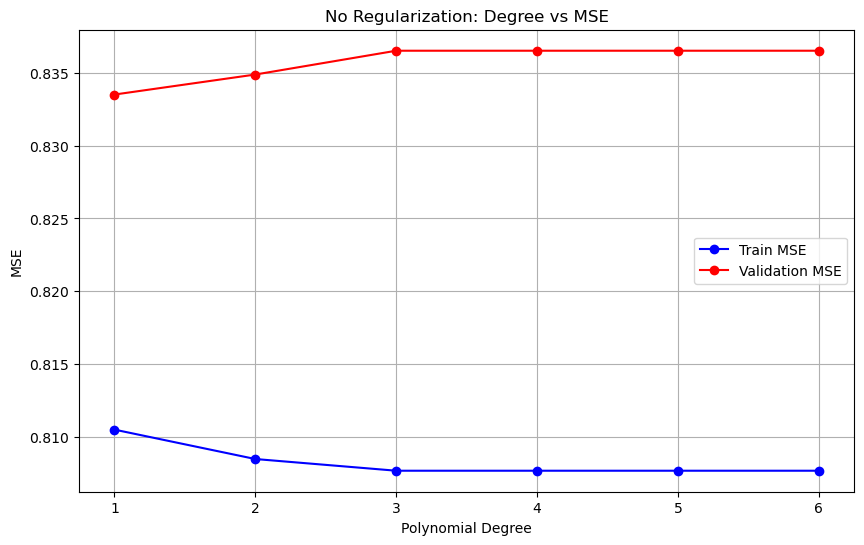

Trend: As degree increases, train MSE decreases but val MSE increases after degree 2-3 (overfitting)


In [46]:
# No Regularization Analysis

degrees = range(1, 7)
train_mses_no_reg = []
val_mses_no_reg = []

for degree in degrees:
    results = run_poly_regression(X_train_gpa, y_train_gpa, X_val_gpa, y_val_gpa, 
                                 X_test_gpa, y_test_gpa, degree=degree)
    train_mses_no_reg.append(results['train_mse'])
    val_mses_no_reg.append(results['val_mse'])
    print(f"Degree {degree}: Train MSE = {results['train_mse']:.4f}, Val MSE = {results['val_mse']:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mses_no_reg, 'bo-', label='Train MSE')
plt.plot(degrees, val_mses_no_reg, 'ro-', label='Validation MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('No Regularization: Degree vs MSE')
plt.legend()
plt.grid(True)
plt.show()

print("Trend: As degree increases, train MSE decreases but val MSE increases after degree 2-3 (overfitting)")

Degree 1: Best reg = 0.01, Val MSE = 0.8326
Degree 2: Best reg = 0.01, Val MSE = 0.8327
Degree 3: Best reg = 0.01, Val MSE = 0.8327
Degree 4: Best reg = 0.01, Val MSE = 0.8327
Degree 5: Best reg = 0.01, Val MSE = 0.8327
Degree 6: Best reg = 0.01, Val MSE = 0.8327
Best degree for L1: 1


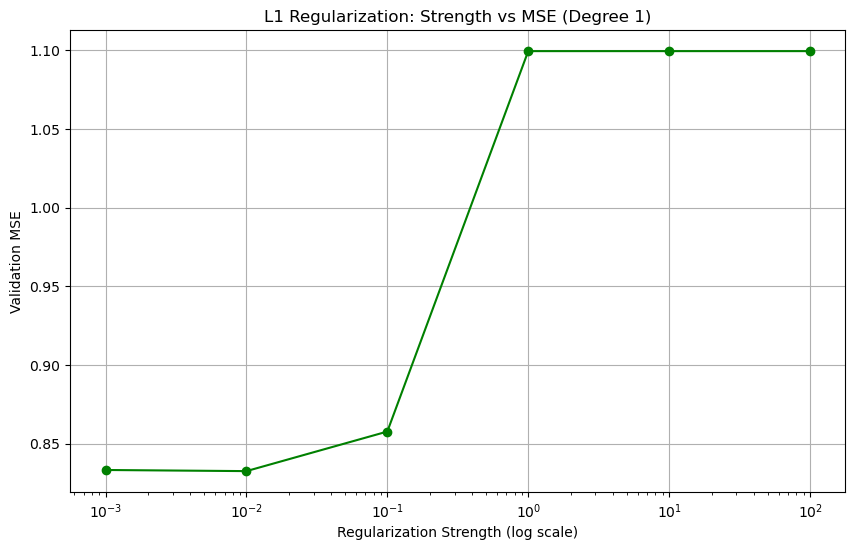

In [47]:
# L1 Regularization Analysis

reg_strengths = [0.001, 0.01, 0.1, 1, 10, 100]
best_l1_results = {}

for degree in degrees:
    best_val_mse = float('inf')
    best_reg = 0
    best_results = None
    
    for reg in reg_strengths:
        results = run_poly_regression(X_train_gpa, y_train_gpa, X_val_gpa, y_val_gpa,
                                    X_test_gpa, y_test_gpa, degree=degree, 
                                    regularizer='l1', reg_strength=reg)
        
        if results['val_mse'] < best_val_mse:
            best_val_mse = results['val_mse']
            best_reg = reg
            best_results = results
    
    best_l1_results[degree] = best_results
    print(f"Degree {degree}: Best reg = {best_reg}, Val MSE = {best_val_mse:.4f}")

# Find best degree for L1
best_degree_l1 = min(best_l1_results, key=lambda x: best_l1_results[x]['val_mse'])
print(f"Best degree for L1: {best_degree_l1}")

# Plot regularization strength vs MSE for best degree
plt.figure(figsize=(10, 6))
val_mses_l1 = []
for reg in reg_strengths:
    results = run_poly_regression(X_train_gpa, y_train_gpa, X_val_gpa, y_val_gpa,
                                X_test_gpa, y_test_gpa, degree=best_degree_l1,
                                regularizer='l1', reg_strength=reg)
    val_mses_l1.append(results['val_mse'])

plt.semilogx(reg_strengths, val_mses_l1, 'go-')
plt.xlabel('Regularization Strength (log scale)')
plt.ylabel('Validation MSE')
plt.title(f'L1 Regularization: Strength vs MSE (Degree {best_degree_l1})')
plt.grid(True)
plt.show()

Degree 1: Best reg = 0.001, Val MSE = 0.8335
Degree 2: Best reg = 0.001, Val MSE = 0.8349
Degree 3: Best reg = 0.001, Val MSE = 0.8365
Degree 4: Best reg = 0.001, Val MSE = 0.8365
Degree 5: Best reg = 0.001, Val MSE = 0.8365
Degree 6: Best reg = 0.001, Val MSE = 0.8365
Best degree for L2: 1


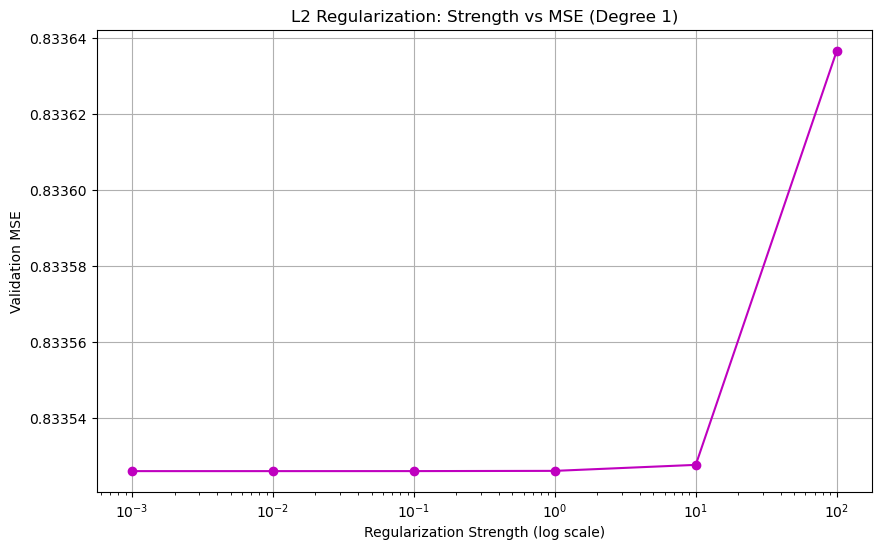

In [48]:
# L2 Regularization Analysis

best_l2_results = {}

for degree in degrees:
    best_val_mse = float('inf')
    best_reg = 0
    best_results = None
    
    for reg in reg_strengths:
        results = run_poly_regression(X_train_gpa, y_train_gpa, X_val_gpa, y_val_gpa,
                                    X_test_gpa, y_test_gpa, degree=degree, 
                                    regularizer='l2', reg_strength=reg)
        
        if results['val_mse'] < best_val_mse:
            best_val_mse = results['val_mse']
            best_reg = reg
            best_results = results
    
    best_l2_results[degree] = best_results
    print(f"Degree {degree}: Best reg = {best_reg}, Val MSE = {best_val_mse:.4f}")

# Find best degree for L2
best_degree_l2 = min(best_l2_results, key=lambda x: best_l2_results[x]['val_mse'])
print(f"Best degree for L2: {best_degree_l2}")

# Plot regularization strength vs MSE for best degree
plt.figure(figsize=(10, 6))
val_mses_l2 = []
for reg in reg_strengths:
    results = run_poly_regression(X_train_gpa, y_train_gpa, X_val_gpa, y_val_gpa,
                                X_test_gpa, y_test_gpa, degree=best_degree_l2,
                                regularizer='l2', reg_strength=reg)
    val_mses_l2.append(results['val_mse'])

plt.semilogx(reg_strengths, val_mses_l2, 'mo-')
plt.xlabel('Regularization Strength (log scale)')
plt.ylabel('Validation MSE')
plt.title(f'L2 Regularization: Strength vs MSE (Degree {best_degree_l2})')
plt.grid(True)
plt.show()

In [49]:
# Compare All Methods

# Get best results from each method
best_no_reg_idx = np.argmin(val_mses_no_reg)
best_no_reg = {
    'degree': degrees[best_no_reg_idx],
    'val_mse': val_mses_no_reg[best_no_reg_idx],
    'test_mse': run_poly_regression(X_train_gpa, y_train_gpa, X_val_gpa, y_val_gpa,
                                   X_test_gpa, y_test_gpa, degree=degrees[best_no_reg_idx])['test_mse']
}

best_l1 = best_l1_results[best_degree_l1]
best_l2 = best_l2_results[best_degree_l2]

print("Best No Regularization:")
print(f"  Degree: {best_no_reg['degree']}, Val MSE: {best_no_reg['val_mse']:.4f}, Test MSE: {best_no_reg['test_mse']:.4f}")

print("Best L1 Regularization:")
print(f"  Degree: {best_degree_l1}, Val MSE: {best_l1['val_mse']:.4f}, Test MSE: {best_l1['test_mse']:.4f}")

print("Best L2 Regularization:")
print(f"  Degree: {best_degree_l2}, Val MSE: {best_l2['val_mse']:.4f}, Test MSE: {best_l2['test_mse']:.4f}")

# Determine overall best
methods = {
    'No Reg': best_no_reg,
    'L1': {'degree': best_degree_l1, 'val_mse': best_l1['val_mse'], 'test_mse': best_l1['test_mse']},
    'L2': {'degree': best_degree_l2, 'val_mse': best_l2['val_mse'], 'test_mse': best_l2['test_mse']}
}

best_method = min(methods, key=lambda x: methods[x]['test_mse'])
print(f"\nOverall Best: {best_method}")
print(f"Test MSE: {methods[best_method]['test_mse']:.4f}")

print("\nRegularization improves performance by preventing overfitting, especially for higher degrees.")

Best No Regularization:
  Degree: 1, Val MSE: 0.8335, Test MSE: 0.8223
Best L1 Regularization:
  Degree: 1, Val MSE: 0.8326, Test MSE: 0.8207
Best L2 Regularization:
  Degree: 1, Val MSE: 0.8335, Test MSE: 0.8223

Overall Best: L1
Test MSE: 0.8207

Regularization improves performance by preventing overfitting, especially for higher degrees.


In [50]:
# Feature Importance Analysis

# Get feature names from one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(train_df[['Gender', 'Major', 'Program']])
feature_names = encoder.get_feature_names_out(['Gender', 'Major', 'Program'])

print("Feature names:", feature_names)

# Analyze L1 feature weights
print("\nL1 Regularization (Sparse weights):")
l1_coef = best_l1['coefficients']
non_zero_l1 = np.sum(l1_coef != 0)
print(f"Non-zero coefficients: {non_zero_l1}/{len(l1_coef)}")

# Top features for L1
l1_feature_importance = pd.DataFrame({
    'feature': feature_names[:len(l1_coef)],  # For degree 1
    'weight': l1_coef
}).sort_values('weight', key=abs, ascending=False)

print("Top L1 features:")
print(l1_feature_importance.head(10))

# Analyze L2 feature weights  
print("\nL2 Regularization (All weights non-zero):")
l2_coef = best_l2['coefficients']
l2_feature_importance = pd.DataFrame({
    'feature': feature_names[:len(l2_coef)],  # For degree 1
    'weight': l2_coef
}).sort_values('weight', key=abs, ascending=False)

print("Top L2 features:")
print(l2_feature_importance.head(10))

print("\nDifferences:")
print("- L1 creates sparse models (many zero weights)")
print("- L2 keeps all features but shrinks weights")
print("- Both help identify important predictors for GPA")

Feature names: ['Gender_Male' 'Gender_Other' 'Major_MS' 'Major_PhD' 'Program_CND'
 'Program_CSE' 'Program_ECE']

L1 Regularization (Sparse weights):
Non-zero coefficients: 5/7
Top L1 features:
        feature    weight
2      Major_MS  0.401577
3     Major_PhD  0.380835
0   Gender_Male -0.010870
1  Gender_Other -0.007192
4   Program_CND -0.000674
5   Program_CSE  0.000000
6   Program_ECE  0.000000

L2 Regularization (All weights non-zero):
Top L2 features:
        feature    weight
2      Major_MS  0.414364
3     Major_PhD  0.393929
0   Gender_Male -0.023258
1  Gender_Other -0.019782
4   Program_CND -0.016018
6   Program_ECE -0.005487
5   Program_CSE -0.005163

Differences:
- L1 creates sparse models (many zero weights)
- L2 keeps all features but shrinks weights
- Both help identify important predictors for GPA
